# Imports

In [53]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score

# Dataframes

In [17]:
df = pd.read_csv('/Users/anilthapa/datasets/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
df.shape

(768, 9)

In [19]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [21]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [22]:
X, y = df.drop('Outcome', axis = 1), df['Outcome']

# Train & Test Split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Scaling the features

In [30]:
scaler = StandardScaler()

In [31]:
scaler.fit(X_train)

StandardScaler()

In [32]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Intialize the model

In [38]:
log_reg = LogisticRegression()

In [39]:
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [40]:
y_predict = log_reg.predict(X_test_scaled)

# Confusion Matrix Display

In [43]:
c_matrix = confusion_matrix(y_test, y_predict)

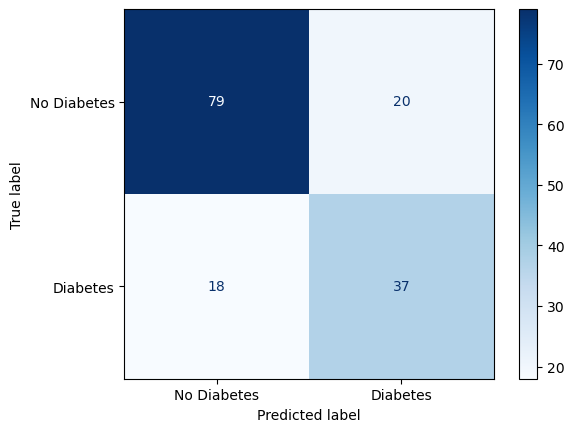

In [48]:
c_matrix_display = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=['No Diabetes', 'Diabetes'])
c_matrix_display.plot(cmap='Blues')

In [50]:
precision_score(y_test, y_predict)

0.6491228070175439

In [52]:
recall_score(y_test, y_predict)

0.6727272727272727

# Singular Value Decomposition for extracting important features

In [99]:
svd = TruncatedSVD(n_components=6)

In [100]:
svd.fit(X_train_scaled)

TruncatedSVD(n_components=6)

In [102]:
X_train_scaled = svd.transform(X_test_scaled)

In [104]:
X_test_scaled = svd.transform(X_test_scaled)

In [105]:
log_reg_svd = LogisticRegression()

In [106]:
log_reg_svd.fit(X_train_scaled, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [154, 614]